In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from multicamera_acquisition.interfaces.camera_basler import BaslerCamera, EmulatedBaslerCamera

## Refactored basler (emulated)

In [3]:
num_devices = 1
os.environ["PYLON_CAMEMU"] = f"{num_devices}"

# del os.environ['PYLON_CAMEMU']


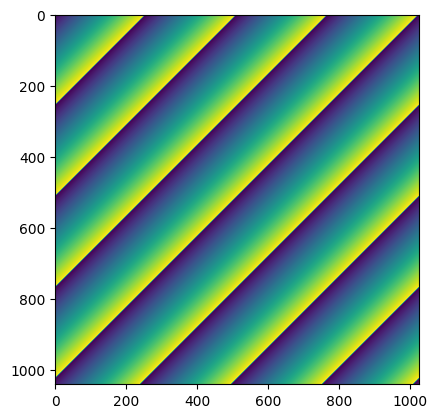

In [4]:
cam = EmulatedBaslerCamera(id=0)
cam.init()
cam.set_trigger_mode("continuous")  # allows cam to caquire without hardware triggers
cam.start()
img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(img)

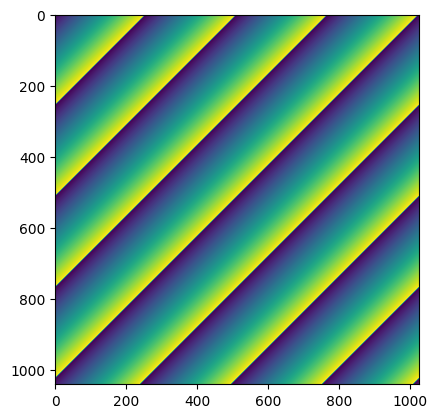

In [5]:
cam.start()
new_img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(new_img)

In [6]:
cam.close()

In [7]:
# cam.start()
# new_img = cam.get_array(timeout=1000)
# cam.stop()
# plt.imshow(new_img)

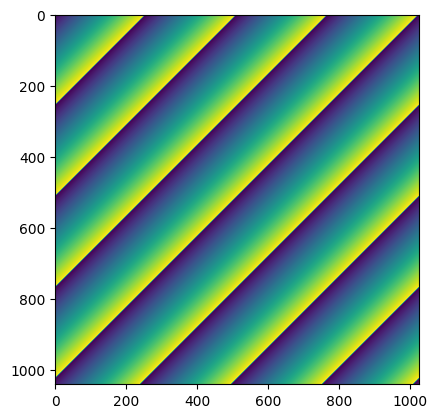

In [8]:
cam.init()
cam.set_trigger_mode("continuous")  # allows cam to caquire without hardware triggers
cam.start()
new_img = cam.get_array(timeout=1000)
cam.stop()
plt.imshow(new_img)

## Refactor config funcs

In [10]:
from multicamera_acquisition.interfaces.camera_basler import BaslerCamera
from multicamera_acquisition.interfaces.config import create_full_camera_default_config
from multicamera_acquisition.config import load_config
from multicamera_acquisition.interfaces.config import partial_config_from_camera_list

### Use case 1: user just loads a config file

In [11]:
config_filepath = "../multicamera_acquisition/scratch/test_recording/24-01-01-21-42-55-733138/recording_config.yaml"
# run_acquisition(config_filepath, ...)  # can just pass the path

# or if you want to inspect it
config = load_config(config_filepath)
config["cameras"]["bottom"]
# run_acquisition(config, ...)


FileNotFoundError: [Errno 2] No such file or directory: '../multicamera_acquisition/scratch/test_recording/24-01-01-21-42-55-733138/recording_config.yaml'

### Use case 2: user wants to specify values from a camera_list

In [12]:
quality = 15
exposure_time = 1000
fps = 120
camera_list = [
    {'name': 'top','id': "40338090", 'brand':'basler','gain': 30, 'gpu':0, "display":True, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S1', 'id': "40338089", 'brand':'basler', 'gain': 30, 'gpu':1, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S2', 'id': "40338086", 'brand':'basler', 'gain': 30, 'gpu':0, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    {'name': 'S3', 'id': "40338106", 'brand':'basler', 'gain': 30, 'gpu':1, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
    { 'name': 'S4', 'id': "40338091", 'brand':'basler', 'gain': 30, 'gpu':0, "display":display, "trigger_line":"Line2", "quality": quality, "exposure_time":exposure_time},
]

partial_new_config = partial_config_from_camera_list(camera_list, fps)
full_config = create_full_camera_default_config(partial_new_config)
full_config
# run_acquisition(full_config, ...)

TypeError: partial_config_from_camera_list() takes 1 positional argument but 2 were given

### Use case 3: user changes stuff manually

In [9]:
old_config = load_config("../multicamera_acquisition/scratch/test_recording/24-01-01-21-42-55-733138/recording_config.yaml")
old_config["cameras"]["bottom"]["exposure_time"] = 1300
# run_acquisition(full_config, ...)

In [10]:
partial_new_config["cameras"]["top"]["brand"]

'basler'

In [ ]:
camera_list = [
            {"name": "top", "brand": "basler", "id": 0},
            {"name": "bottom", "brand": "basler", "id": 1}
]
fps = 30
rt_display_params = None 

# set up the configs
partial_new_config = partial_config_from_camera_list(camera_list, fps)
partial_new_config

{'cameras': {'top': {'writer': {},
   'display': {},
   'name': 'top',
   'brand': 'basler',
   'id': 0,
   'fps': 30},
  'bottom': {'writer': {},
   'display': {},
   'name': 'bottom',
   'brand': 'basler',
   'id': 1,
   'fps': 30}}}